In [1]:
import pandas as pd
import os
import json
from matplotlib import pyplot
import seaborn as sns

pd.set_option('display.max_columns', 45)

In [2]:
wpath = os.getcwd()
path = f'{wpath}/resultados/rotas'
pasta = os.listdir(path)
print(pasta)

['1.json', '10.json', '11.json', '12.json', '13.json', '14.json', '15.json', '16.json', '17.json', '18.json', '19.json', '2.json', '20.json', '21.json', '22.json', '23.json', '24.json', '25.json', '26.json', '27.json', '28.json', '29.json', '3.json', '30.json', '4.json', '5.json', '6.json', '7.json', '8.json', '9.json']


In [3]:
# [passo,rota,grupo,demanda,vsensor,vgoogle]
rotas_json = []

for p in pasta:
    if p[-5:] == '.json':
        with open(f'{path}/{p}') as json_file:
            dados_json = json.load(json_file)
            for chave, valor in dados_json.items():

                grupo = None
                if chave in ('route_0', 'route_1', 'route_3'):
                    grupo = 'oeste'
                if chave in ('route_4', 'route_5', 'route_7'):
                    grupo = 'leste'
                if chave in ('route_11', 'route_12', 'route_13'):
                    grupo = 'sul'
                if chave in ('route_14', 'route_15', 'route_16', 'route_8', 'route_9', 'route_10'):
                    grupo = 'norte'

                rotas_json.append([int(p.split('.')[0]), chave, grupo, int(valor['demanda_atrib']),
                                   float(valor['sensor_speed1']), float(valor['vmax_sensor1']), float(valor['vmin_sensor1'])])

rotas_sumo = pd.DataFrame(rotas_json, columns=[
    'passo', 'rota', 'grupo', 'demanda', 'vsensor', 'vmax', 'vmin'])

rotas_sumo.head()


,passo,rota,grupo,demanda,vsensor,vmax,vmin
0,1,route_0,oeste,10,12.906667,8.79,4.8
1,1,route_1,oeste,10,12.906667,8.79,4.8
2,1,route_10,norte,10,8.242500,6.04,3.3
3,1,route_11,sul,10,8.349167,6.04,3.3
4,1,route_12,sul,10,8.349167,6.04,3.3


In [4]:
rotas_sumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   passo    450 non-null    int64  
 1   rota     450 non-null    object 
 2   grupo    450 non-null    object 
 3   demanda  450 non-null    int64  
 4   vsensor  450 non-null    float64
 5   vmax     450 non-null    float64
 6   vmin     450 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 24.7+ KB


# Progressão dos grupos ao longo da simulação

In [5]:
rotas_sumo_grupos = rotas_sumo.groupby(
    ['passo','grupo']).agg({'demanda': 'sum', 'vsensor': 'mean', 'vmax': 'mean', 'vmin': 'mean'}).reset_index()

rotas_sumo_grupos.head()


,passo,grupo,demanda,vsensor,vmax,vmin
0,1,leste,30,12.799583,8.790,4.800
1,1,norte,60,8.016875,6.865,4.675
2,1,oeste,30,12.906667,8.790,4.800
3,1,sul,30,8.349167,6.040,3.300
4,2,leste,141,14.200385,8.790,4.800


In [6]:
rotas_sumo_grupos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   passo    120 non-null    int64  
 1   grupo    120 non-null    object 
 2   demanda  120 non-null    int64  
 3   vsensor  120 non-null    float64
 4   vmax     120 non-null    float64
 5   vmin     120 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.8+ KB


Text(0, 0.5, 'nº de veículos alocados')

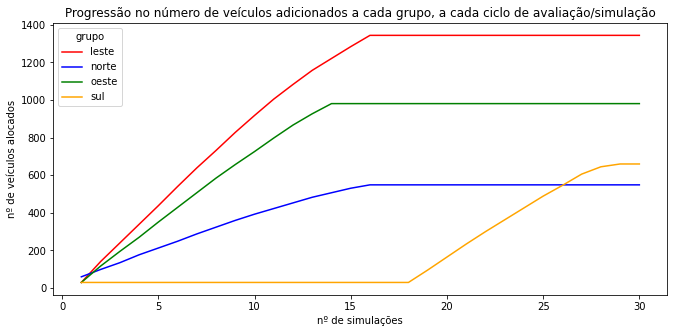

In [7]:
fig, ax = pyplot.subplots(figsize=(11, 5))
rotas_grupos = sns.lineplot(data=rotas_sumo_grupos, x='passo', y='demanda', hue='grupo', palette=[
                      'red', 'blue', 'green', 'orange'], ax=ax)
rotas_grupos.set_title(
    "Progressão no número de veículos adicionados a cada grupo, a cada ciclo de avaliação/simulação")
rotas_grupos.set_xlabel("nº de simulações", fontsize=10)
rotas_grupos.set_ylabel("nº de veículos alocados", fontsize=10)

# Progressão por rotas

In [11]:
rotas_sumo_leste = rotas_sumo.loc[rotas_sumo['grupo'] == 'leste'].groupby(
    ['passo', 'rota']).agg({'demanda': 'sum', 'vsensor': 'mean', 'vmax': 'mean'}).reset_index()

rotas_sumo_leste.head()


,passo,rota,demanda,vsensor,vmax
0,1,route_4,10,12.799583,8.79
1,1,route_5,10,12.799583,8.79
2,1,route_7,10,12.799583,8.79
3,2,route_4,47,14.200385,8.79
4,2,route_5,47,14.200385,8.79


Text(0, 0.5, 'nº de veículos alocados')

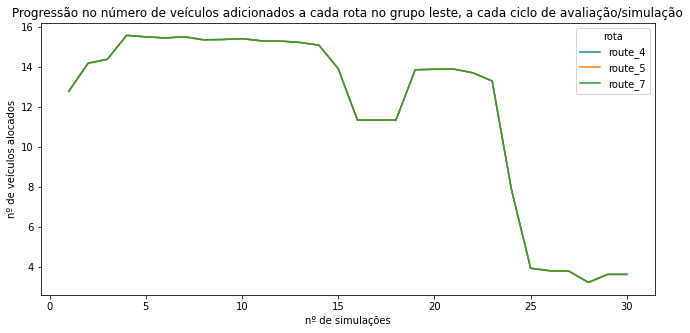

In [12]:
fig, ax = pyplot.subplots(figsize=(11, 5))
rotas_leste = sns.lineplot(data=rotas_sumo_leste, x='passo', y='vsensor', hue='rota', ax=ax)
rotas_leste.set_title(
    "Progressão no número de veículos adicionados a cada rota no grupo leste, a cada ciclo de avaliação/simulação")
rotas_leste.set_xlabel("nº de simulações", fontsize=10)
rotas_leste.set_ylabel("nº de veículos alocados", fontsize=10)